# Gamma Spectroscopy Data Analysis

In [2]:
###########################################
#   Setup standard analysis environment   # 
###########################################

import os, sys
from math import *

import pandas as pd
import numpy as np
#np.set_printoptions(threshold=np.inf)

import scipy
from scipy import stats
import scipy.integrate as spi

# Plotting modules
import matplotlib.pyplot as plt
from matplotlib import style
#import matplotlib.image as mpimg
%matplotlib inline
style.use('ggplot')

from bokeh.plotting import figure, output_notebook, show
output_notebook(hide_banner=True)

# LaTeX rendering in plots 
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

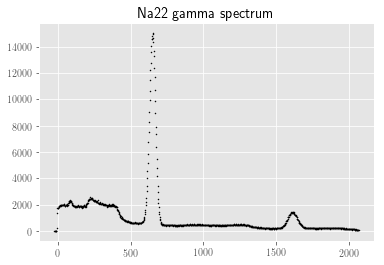

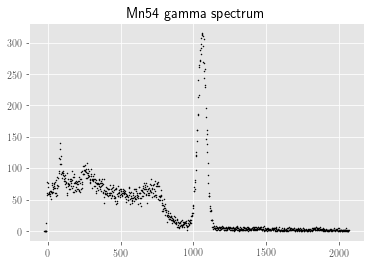

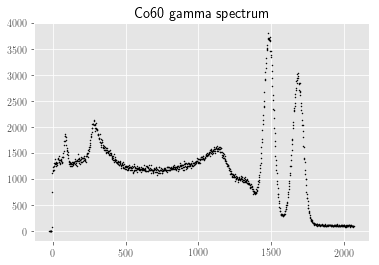

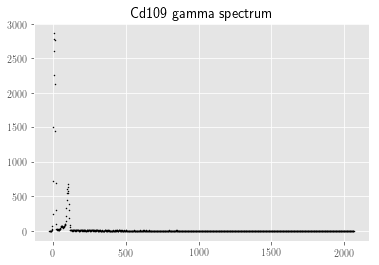

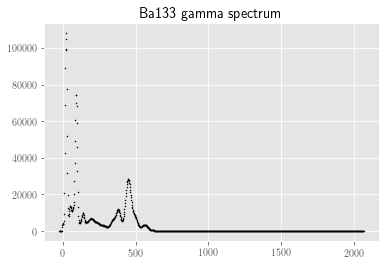

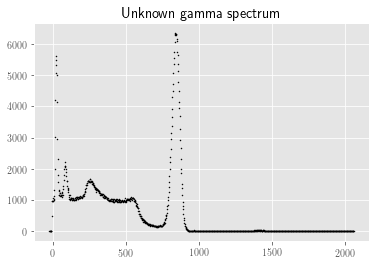

In [4]:
data = pd.read_csv('data/calib_na22.csv', header = 0)
x = data.loc[:,'energy']
y = data.loc[:,'counts'] 
plt.scatter(x,y,color='k', s=1)
plt.title('Na22 gamma spectrum')
plt.show()

data = pd.read_csv('data/calib_mn54.csv', header = 0)
x = data.loc[:,'energy']
y = data.loc[:,'counts'] 
plt.title('Mn54 gamma spectrum')
plt.scatter(x,y,color='k', s=1)
plt.show()

data = pd.read_csv('data/calib_co60.csv', header = 0)
x = data.loc[:,'energy']
y = data.loc[:,'counts'] 
plt.title('Co60 gamma spectrum')
plt.scatter(x,y,color='k', s=1)
plt.show()

data = pd.read_csv('data/calib_cd109.csv', header = 0)
x = data.loc[:,'energy']
y = data.loc[:,'counts'] 
plt.title('Cd109 gamma spectrum')
plt.scatter(x,y,color='k', s=1)
plt.show()

data = pd.read_csv('data/calib_ba133.csv', header = 0)
x = data.loc[:,'energy']
y = data.loc[:,'counts'] 
plt.title('Ba133 gamma spectrum')
plt.scatter(x,y,color='k', s=1)
plt.show()

data = pd.read_csv('data/unknown.csv', header = 0)
x = data.loc[:,'energy']
y = data.loc[:,'counts'] 
plt.title('Unknown gamma spectrum')
plt.scatter(x,y,color='k', s=1)
plt.show()

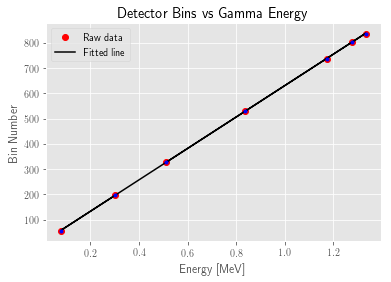

[[ 6.65420567 -5.43770203]
 [-5.43770203  5.79052102]]


In [5]:
# Get initial fit

# Excludes Cd and Ba runs due to greaterer uncertainty 

# MeV
x1 = e = [.511, .835, 1.173, 1.275, 1.333, 0.081, 0.303]
y = bins = [330, 530, 737, 801, 835, 57, 196]

#sigma = [0.5, 1.2, 0.5, 1.2, 0.3,  0.28, 0.1] #Commented this out to run with all sigma \geq 1 channel
sigma = [1, 1.2, 1, 1.2, 1, 1, 1]
#w = [i**-1 for i in sigma]

f, cov = np.polyfit(x1, y, 1, w=sigma, cov=True)
y_f = np.polyval(f,x1)
 
plt.plot(x1, y, 'ro', label='Raw data')
plt.plot(x1, y_f, 'k-', label='Fitted line')
plt.Axes.set_bgcolor='white'
plt.ylabel('Bin Number')
plt.xlabel('Energy [MeV]')
plt.title('Detector Bins vs Gamma Energy')
plt.legend()
plt.errorbar(x1,y,yerr=sigma,fmt='b.')
plt.show();

print(cov)

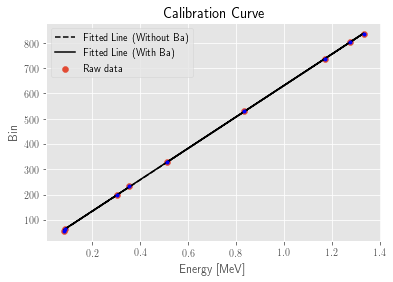

In [12]:
# MeV
x = e = [.511, .835, 1.173, 1.275, 1.333, 0.088, 0.081, 0.303, 0.356]
#Excluded bin 81.82 and energy 0.276 from Ba because they didn't seem to correspond to one another
#Same with bin 285.3 and energy 0.384; don't come close to hitting the line with current error bars
#Given how long this sample has been around, it's entirely possible some lines have faded and others from byproducts have appeared
y = bins = [330.4, 530, 737.3, 801.7, 835.6, 62.27, 57.21, 196.6, 233.9]

sigma = [1, 2, 1, 2, 1, 1, 1, 1, 1]

#w = [i**-1 for i in sigma]

f2, cov2 = np.polyfit(x, y, 1, w=sigma,cov=True)
y_f2 = np.polyval(f2,x)

plt.scatter(x,y,label='Raw data')
plt.plot(x1, y_f, 'k--', label='Fitted Line (Without Ba)')
plt.plot(x, y_f2, 'k-', label='Fitted Line (With Ba)')
plt.Axes.set_bgcolor='white'
plt.ylabel('Bin')
plt.xlabel('Energy [MeV]')
plt.title('Calibration Curve')
plt.legend()
plt.errorbar(x,y,yerr=sigma,fmt='b.')
plt.show();

In [37]:
print('unknown peak one: ',np.polyval(f,24))
print('unknown peak two: ',np.polyval(f,54))
print('unknown peak three: ',np.polyval(f,424))

unknown peak one:  0.017494411392453654
unknown peak two:  0.06603384096132989
unknown peak three:  0.6646868056441367


Peak one corresponds to about 17.5 keV, which is in the range of x-ray radiation, possibly background from ambient isotopes.

Peak two corresponds to 66 keV, Ti-44 and Ta-182. Ta-182, however, has a half life of only 115 days, and Ti-44 only 48 hours. So it is unlikely that enough of either material would be left in a sample more than a few years old to emit gammas in the expected energy range. 

Peak three corresponds to 0.664 MeV, which is 0.3% away from the characteristic gamma peak emitted by Cs-137, which then is likely to be one of the two isotopes in the unknown sample. 

Sources

https://www.cpp.edu/~pbsiegel/bio431/genergies.html
    
http://www.spectrumtechniques.com/products/sources/isotope-generator-kit/
    
http://www.people.vcu.edu/~mhcrosthwait/clrs322/Pulseanalysis.htm



In [27]:
#uncertainties
perr = np.sqrt(np.diag(cov))
print (perr)

[2.57957471 2.40635015]


In [39]:
#Chi square - fit 1
y_f1 = np.polyval(f,x)
scipy.stats.chisquare(y,y_f1)

Power_divergenceResult(statistic=0.25472936219409015, pvalue=0.9999997487885737)

In [13]:
#Chi square - fit 2
scipy.stats.chisquare(y,y_f2)

Power_divergenceResult(statistic=0.305529134701859, pvalue=0.999979911858046)

In [28]:
print(f)

[621.18884356   9.08078182]


In [14]:
print(f2)

[621.34827067   9.78776632]
